<a href="https://colab.research.google.com/github/Nerobite/libraries_for_DA/blob/main/advanced_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

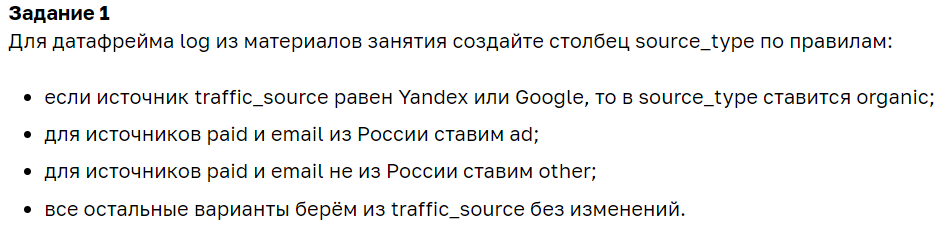

In [3]:
#Задание №1
df = pd.read_csv('visit_log.csv', sep = ';')
df.head()

,timestamp,visit_id,url,region,user_id,traffic_source
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex


In [4]:
# вариант 1
def s_t(row):
  if row['traffic_source']=='yandex':
        return 'organic'
  elif row['traffic_source']=='google':
        return 'organic'
  elif row['traffic_source']=='paid':
      if row['region']=='Russia':
          return 'ad'
      else:
          return 'other'
  elif row['traffic_source']=='email':
      if row['region']=='Russia':
          return 'ad'
      else:
            return 'other'
  else:
        return row['traffic_source']
df['source_type'] = df.apply(s_t, axis = 1)
df.head(15)

,timestamp,visit_id,url,region,user_id,traffic_source,source_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic
5,1549980742,8855508aad,https://host.ru/df646c3676cc259fa0,Russia,fc43898e47,yandex,organic
6,1549980742,b0f66adc83,https://host.ru/b8b58337d272ee7b15,Russia,13fc55e781,paid,ad
7,1549980754,837885c8f8,https://host.ru/108ce4b365afb7b88e,Russia,cb5082b6f6,direct,direct
8,1549980760,af5570f5a1,https://host.ru/3004a8273caeef2867,China,45664f7af2,direct,direct
9,1549980765,3e7077fd2f,https://host.ru/df646c3676cc259fa0,Russia,6f9de8c8b6,email,ad


In [5]:
# вариант 2
df1 = df.copy()

In [28]:
df1.loc[df.traffic_source.isin(['yandex', 'google']), 'traffic_type'] = 'organic'
df1.loc[(df.traffic_source.isin(['paid', 'email']) & df.region.isin(['Russia'])), 'traffic_type'] = 'ad'
df1.loc[(df.traffic_source.isin(['paid', 'email']) & ~df.region.isin(['Russia'])), 'traffic_type'] = 'other'
df1.loc[(~df.traffic_source.isin(['paid', 'email', 'yandex', 'google'])), 'traffic_type'] = df1['traffic_source']

In [32]:
df1

,timestamp,visit_id,url,region,user_id,traffic_source,source_type,traffic_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,direct,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic,organic
...,...,...,...,...,...,...,...,...
18933,1550094288,57e5ba8560,https://host.ru/c2382eb3d6afc8d0f3,Belarus,98b19810d0,paid,other,other
18934,1550094296,6f9389ec1b,https://host.ru/f1eb4601740d627ab0,Russia,32ebb20c13,paid,ad,ad
18935,1550094308,e8cf2eb8e6,https://host.ru/a5dda93e70318570c0,Belarus,b85baa8c73,yandex,organic,organic
18936,1550094314,79530b9a67,https://host.ru/6fda01ec57f23abc9e,Russia,e154b06121,paid,ad,ad


In [33]:
df1['source_type'] == df1['traffic_type']

0        True
1        True
2        True
3        True
4        True
         ... 
18933    True
18934    True
18935    True
18936    True
18937    True
Length: 18938, dtype: bool

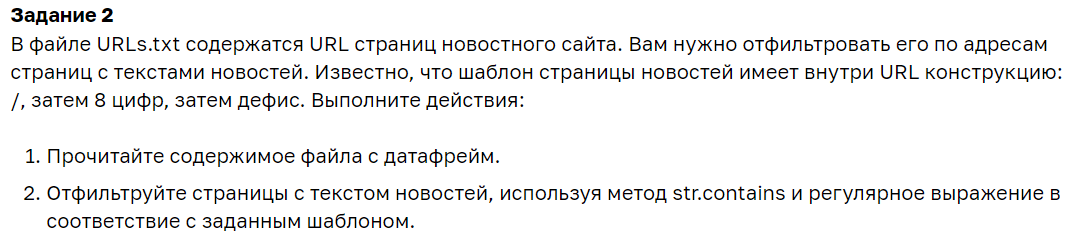

In [34]:
#Задание №2
urls_ = pd.read_csv('URLs.txt')
urls_.head()

,url
0,/world/
1,/latest/
2,/?updated=top
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...


In [35]:
urls_[urls_.url.str.contains('/[0-9]{8}-', regex=True)].head()

,url
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...
5,/science/36157853-nasa-sobiraet-ekstrennuyu-pr...
6,/video/36001498-poyavilis-pervye-podrobnosti-g...
7,/world/36007585-tramp-pridumal-kak-reshit-ukra...


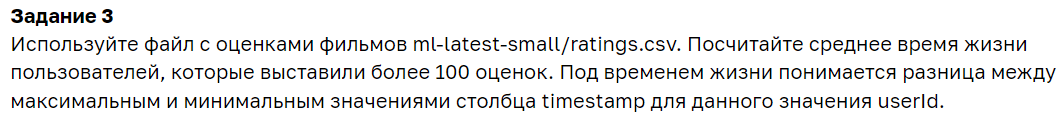

In [36]:
#Задание №3
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [37]:
data = ratings_df.groupby('userId').count().reset_index()
data = data[data.rating > 100]
data.head()

,userId,movieId,rating,timestamp
3,4,204,204,204
7,8,116,116,116
14,15,1700,1700,1700
16,17,363,363,363
18,19,423,423,423


In [39]:
t_max = ratings_df.groupby('userId').max().reset_index()
t_max.head()

,userId,movieId,rating,timestamp
0,1,3671,4.0,1260759205
1,2,720,5.0,835356246
2,3,84236,5.0,1298932787
3,4,4006,5.0,949982274
4,5,48385,5.0,1163375145


In [40]:
t_min = ratings_df.groupby('userId').min().reset_index()
t_min.head()

,userId,movieId,rating,timestamp
0,1,31,1.0,1260759108
1,2,10,1.0,835355395
2,3,60,2.0,1298861589
3,4,10,1.0,949778714
4,5,3,1.5,1163373044


In [41]:
data['averege'] = t_max['timestamp'] - t_min['timestamp']
data.head(15)

,userId,movieId,rating,timestamp,averege
3,4,204,204,204,203560
7,8,116,116,116,85187
14,15,1700,1700,1700,471393496
16,17,363,363,363,8053
18,19,423,423,423,5282
20,21,162,162,162,1365432
21,22,220,220,220,91491
22,23,726,726,726,18342129
25,26,172,172,172,20267261
29,30,1011,1011,1011,115852276


In [42]:
averege_ = data['averege'].sum()/len(data)
averege_

40080507.4496124

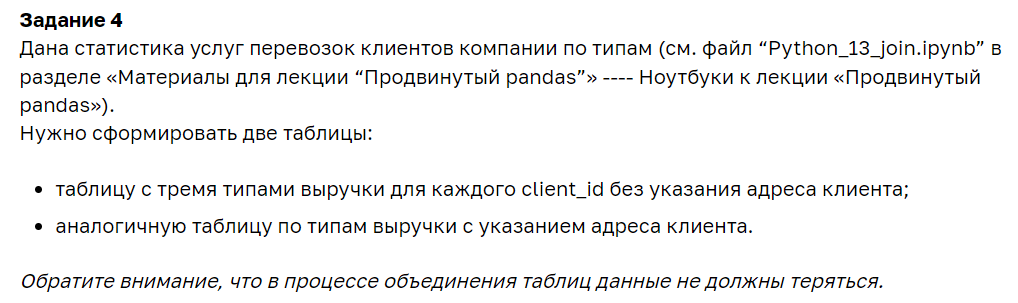

In [43]:
#Задание №4
rzd = pd.DataFrame(
     {
      'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)
rzd


,client_id,rzd_revenue
0,111,1093
1,112,2810
2,113,10283
3,114,5774
4,115,981


In [44]:
auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)
auto

,client_id,auto_revenue
0,113,57483
1,114,83
2,115,912
3,116,4834
4,117,98


In [45]:
air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)
air

,client_id,air_revenue
0,115,81
1,116,4
2,117,13
3,118,173


In [46]:
client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1',
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)
client_base

,client_id,address
0,111,Комсомольская 4
1,112,Энтузиастов 8а
2,113,Левобережная 1а
3,114,Мира 14
4,115,ЗЖБИиДК 1
5,116,Строителей 18
6,117,Панфиловская 33
7,118,Мастеркова 4


In [48]:
from numpy import outer

df_revenue = rzd.merge(auto, how= 'outer')
df_revenue = df_revenue.merge(air, how = 'outer')
df_revenue

,client_id,rzd_revenue,auto_revenue,air_revenue
0,111,1093.0,NaN,NaN
1,112,2810.0,NaN,NaN
2,113,10283.0,57483.0,NaN
3,114,5774.0,83.0,NaN
4,115,981.0,912.0,81.0
5,116,NaN,4834.0,4.0
6,117,NaN,98.0,13.0
7,118,NaN,NaN,173.0


In [49]:
df_address = df_revenue.merge(client_base, how = 'left')
df_address

,client_id,rzd_revenue,auto_revenue,air_revenue,address
0,111,1093.0,NaN,NaN,Комсомольская 4
1,112,2810.0,NaN,NaN,Энтузиастов 8а
2,113,10283.0,57483.0,NaN,Левобережная 1а
3,114,5774.0,83.0,NaN,Мира 14
4,115,981.0,912.0,81.0,ЗЖБИиДК 1
5,116,NaN,4834.0,4.0,Строителей 18
6,117,NaN,98.0,13.0,Панфиловская 33
7,118,NaN,NaN,173.0,Мастеркова 4
